In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cross_validation import train_test_split

from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Home\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
chatbot_df = pd.read_csv("persons.csv",usecols=['feature','label'],encoding='utf-8')
chatbot_df['neu_label'] = Encode.fit_transform(chatbot_df['label'])
x_train,x_test,y_train,y_test = train_test_split(chatbot_df["feature"],chatbot_df['neu_label'],random_state=1)


In [3]:
result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

In [4]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB()
]

KNeighborsClassifier accuracy = 11.11111111111111%
SVC accuracy = 0.0%
NuSVC accuracy = 22.22222222222222%
DecisionTreeClassifier accuracy = 33.33333333333333%
RandomForestClassifier accuracy = 0.0%
AdaBoostClassifier accuracy = 11.11111111111111%
MultinomialNB accuracy = 11.11111111111111%
LogisticRegression accuracy = 11.11111111111111%
RandomForestClassifier accuracy = 11.11111111111111%
LinearSVC accuracy = 22.22222222222222%
MultinomialNB accuracy = 11.11111111111111%


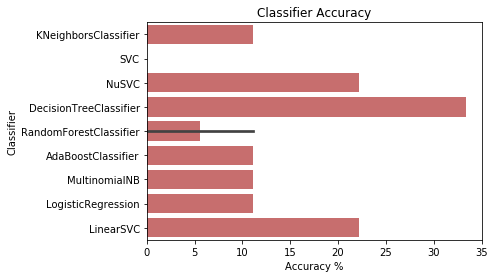

In [5]:
for clf in classifiers:
    name = clf.__class__.__name__
    text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                  ('clf', clf),])
    text_clf.fit(x_train, y_train)
    
    predicted = text_clf.predict(x_test)
    acc = metrics.accuracy_score(y_test,predicted)
    print (name+' accuracy = '+str(acc*100)+'%')
    acc_field = pd.DataFrame([[name, acc*100]], columns=result_cols)
    result_frame = result_frame.append(acc_field)
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()